In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Approximation of the 99 % confidence interval of the mean.
# See: Theorem 2.2 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements: 
# (1) data is iid
# (2) data has finite variance 
# (3) number of samples is large 
def mean_99confint(data):
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = 2.58*sem
    return m-h, m+h

# Confidence interval of the mean.
# See: Theorem 2.3 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements:
# (1) iid data 
# (2) normally distributed data. See Q-Q-plot for a visual indication that our data is approximately 
#     normally distributed.
def mean_confint(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = sem * stats.t.ppf((1.0+confidence)/2.0, n-1)
    return m-h, m+h

In [3]:
# The csv file can be created from a PCAP trace as follows:
# $ tshark -r <tracefile.pcap> -Y 'udp.dstport==6666' -Tfields -Eseparator=, -eframe.time_relative -eframe.time_epoch -edata
senderfile='../data/trace-sender-1.csv'
df_sender = pd.read_csv(senderfile, names=['t_relative', 't_epoch', 'id'])
df_sender.head()

,t_relative,t_epoch,id
0,0.000000,1.720007e+09,00000000001d39ee
1,0.000994,1.720007e+09,00000000001d39ef
2,0.002029,1.720007e+09,00000000001d39f0
3,0.003021,1.720007e+09,00000000001d39f1
4,0.004019,1.720007e+09,00000000001d39f2


In [4]:
# The csv file can be created from the PCAP trace as follows:
# $ tshark -r <tracefile.pcap> -Y 'udp.dstport==6666' -Tfields -Eseparator=, -eframe.time_relative -eframe.time_epoch -edata
receiverfile='../data/trace-receiver-1.csv'
df_receiver = pd.read_csv(receiverfile, names=['t_relative', 't_epoch', 'id'])
df_receiver.head()

,t_relative,t_epoch,id
0,0.000825,1.720007e+09,00000000001d2e95
1,0.000825,1.720007e+09,00000000001d2ea7
2,0.000825,1.720007e+09,00000000001d2e99
3,0.000825,1.720007e+09,00000000001d2e80
4,0.001125,1.720007e+09,00000000001d2ea3


In [5]:
df_merged = pd.merge(df_sender, df_receiver, left_on = ['id'], right_on = ['id'], suffixes=('_sender', '_receiver'))
df_merged.head()

,t_relative_sender,t_epoch_sender,id,t_relative_receiver,t_epoch_receiver
0,0.000000,1.720007e+09,00000000001d39ee,2.844048,1.720007e+09
1,0.000994,1.720007e+09,00000000001d39ef,2.890652,1.720007e+09
2,0.002029,1.720007e+09,00000000001d39f0,2.922388,1.720007e+09
3,0.003021,1.720007e+09,00000000001d39f1,2.922388,1.720007e+09
4,0.004019,1.720007e+09,00000000001d39f2,2.875012,1.720007e+09


In [6]:
df_merged['delay'] = df_merged['t_epoch_receiver'] - df_merged['t_epoch_sender'] 
df_merged.head()

,t_relative_sender,t_epoch_sender,id,t_relative_receiver,t_epoch_receiver,delay
0,0.000000,1.720007e+09,00000000001d39ee,2.844048,1.720007e+09,0.050083
1,0.000994,1.720007e+09,00000000001d39ef,2.890652,1.720007e+09,0.095692
2,0.002029,1.720007e+09,00000000001d39f0,2.922388,1.720007e+09,0.126393
3,0.003021,1.720007e+09,00000000001d39f1,2.922388,1.720007e+09,0.125402
4,0.004019,1.720007e+09,00000000001d39f2,2.875012,1.720007e+09,0.077028


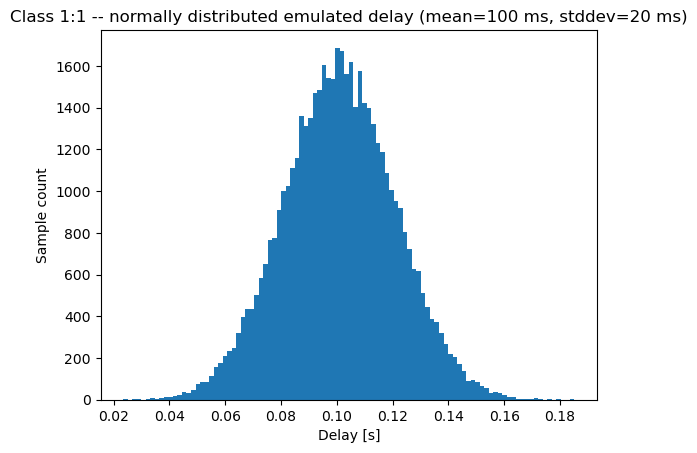

In [7]:
bin_sizes, _, _ = plt.hist(df_merged['delay'], bins=100)
plt.ylabel('Sample count')
plt.xlabel('Delay [s]');
plt.title('Class 1:1 -- normally distributed emulated delay (mean=100 ms, stddev=20 ms)');

In [8]:
min = df_merged['delay'].min()
max = df_merged['delay'].max()
delay_mean = np.mean(df_merged['delay'])
delay_stddev = np.std(df_merged['delay'])

# 99 % confidence interval of the mean.
mean_l,mean_h = mean_confint(df_merged['delay'], confidence=0.99)

print("min = " + str(min) + " s")
print("max = " + str(max) + " s")
print("mean = " + str(delay_mean) + " s")
print("stddev = " + str(delay_stddev) + " s")
print("mean_conf99 = [" + str(mean_l) + " s, " + str(mean_h) + " s]")

min = 0.023476362228393555 s
max = 0.18508028984069824 s
mean = 0.10092317604968809 s
stddev = 0.02004715373043994 s
mean_conf99 = [0.1006917320533329 s, 0.10115462004604328 s]
